<a href="https://colab.research.google.com/github/muhsufyan/iseng/blob/main/perusahaan_tercatat_notasi_khusus_3_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

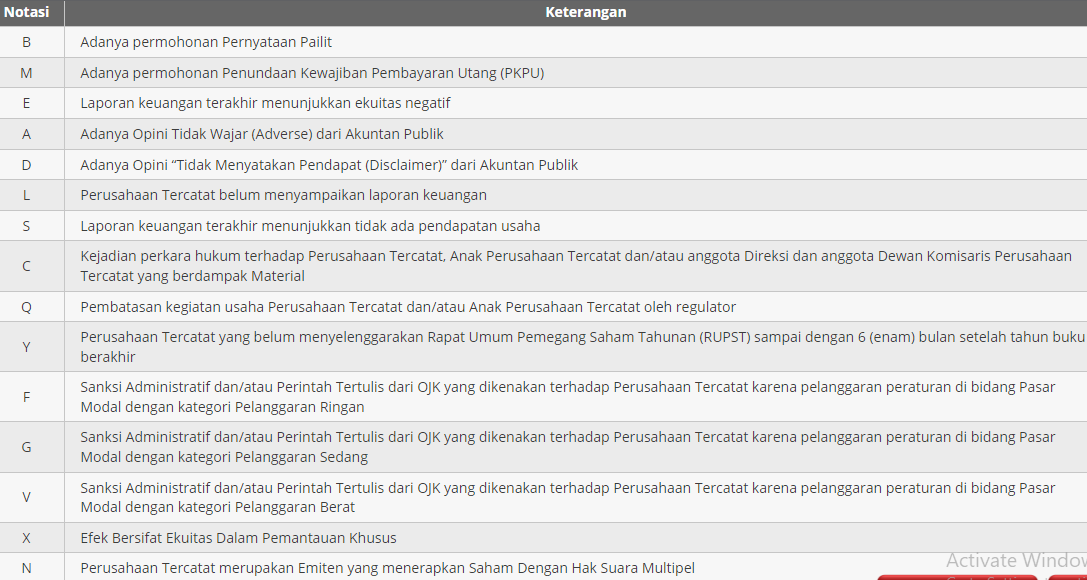

In [9]:
!pip install openpyxl==3.0.9

     |████████████████████████████████| 242 kB 8.2 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [1]:
import pandas as pd
df = pd.read_excel('/content/Notasi Khusus-20220203.xlsx')
df

,No,Kode/Nama Perusahaan,Nama,Notasi,Keterangan Notasi,Remarks2
0,1,UNSP.E,Bakrie Sumatera Plantations Tbk,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------
1,2,COWL.LY,COWELL DEVELOPMENT Tbk,"L,Y",L : Perusahaan Tercatat belum menyampaikan lap...,---------------------L---Y----
2,3,SULI.E,PT SLJ Global Tbk,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------
3,4,OCAP.ESX,ONIX CAPITAL Tbk,"E,S,X",E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E--S------X
4,5,JKSW.E,Jakarta Kyoei Steel Works Tbk,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------
...,...,...,...,...,...,...
76,77,NUSA.LY,PT Sinergi Megah Internusa Tbk,"L,Y",L : Perusahaan Tercatat belum menyampaikan lap...,---------------------L---Y----
77,78,TAXI.E,Express Transindo Utama Tbk,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------
78,79,DEAL.E,PT Dewata Freightinternational Tbk.,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------
79,80,DWGL.E,PT Dwi Guna Laksana Tbk,E,E : Laporan keuangan terakhir menunjukkan ekui...,-------------------E----------


In [2]:
df.dtypes

No                       int64
Kode/Nama Perusahaan    object
Nama                    object
Notasi                  object
Keterangan Notasi       object
Remarks2                object
dtype: object

[hapus kolom](https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe)

In [3]:
df.drop(['Keterangan Notasi','Remarks2'], axis=1, inplace=True)
df

,No,Kode/Nama Perusahaan,Nama,Notasi
0,1,UNSP.E,Bakrie Sumatera Plantations Tbk,E
1,2,COWL.LY,COWELL DEVELOPMENT Tbk,"L,Y"
2,3,SULI.E,PT SLJ Global Tbk,E
3,4,OCAP.ESX,ONIX CAPITAL Tbk,"E,S,X"
4,5,JKSW.E,Jakarta Kyoei Steel Works Tbk,E
...,...,...,...,...
76,77,NUSA.LY,PT Sinergi Megah Internusa Tbk,"L,Y"
77,78,TAXI.E,Express Transindo Utama Tbk,E
78,79,DEAL.E,PT Dewata Freightinternational Tbk.,E
79,80,DWGL.E,PT Dwi Guna Laksana Tbk,E


encode notasi

In [7]:
notasi_enc = df['Notasi'].str.get_dummies(sep=',')
notasi_enc

,A,B,C,D,E,L,M,Q,S,X,Y
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,1,0,0,0,0,1
77,0,0,0,0,1,0,0,0,0,0,0
78,0,0,0,0,1,0,0,0,0,0,0
79,0,0,0,0,1,0,0,0,0,0,0


In [8]:
df = pd.concat([df, notasi_enc], axis=1)

In [9]:
df

,No,Kode/Nama Perusahaan,Nama,Notasi,A,B,C,D,E,L,M,Q,S,X,Y
0,1,UNSP.E,Bakrie Sumatera Plantations Tbk,E,0,0,0,0,1,0,0,0,0,0,0
1,2,COWL.LY,COWELL DEVELOPMENT Tbk,"L,Y",0,0,0,0,0,1,0,0,0,0,1
2,3,SULI.E,PT SLJ Global Tbk,E,0,0,0,0,1,0,0,0,0,0,0
3,4,OCAP.ESX,ONIX CAPITAL Tbk,"E,S,X",0,0,0,0,1,0,0,0,1,1,0
4,5,JKSW.E,Jakarta Kyoei Steel Works Tbk,E,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,NUSA.LY,PT Sinergi Megah Internusa Tbk,"L,Y",0,0,0,0,0,1,0,0,0,0,1
77,78,TAXI.E,Express Transindo Utama Tbk,E,0,0,0,0,1,0,0,0,0,0,0
78,79,DEAL.E,PT Dewata Freightinternational Tbk.,E,0,0,0,0,1,0,0,0,0,0,0
79,80,DWGL.E,PT Dwi Guna Laksana Tbk,E,0,0,0,0,1,0,0,0,0,0,0


In [15]:
df

,No,Kode/Nama Perusahaan,Nama,Notasi,A,B,C,D,E,L,M,Q,S,X,Y
0,1,UNSP.E,Bakrie Sumatera Plantations Tbk,E,0,0,0,0,1,0,0,0,0,0,0
1,2,COWL.LY,COWELL DEVELOPMENT Tbk,"L,Y",0,0,0,0,0,1,0,0,0,0,1
2,3,SULI.E,PT SLJ Global Tbk,E,0,0,0,0,1,0,0,0,0,0,0
3,4,OCAP.ESX,ONIX CAPITAL Tbk,"E,S,X",0,0,0,0,1,0,0,0,1,1,0
4,5,JKSW.E,Jakarta Kyoei Steel Works Tbk,E,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,NUSA.LY,PT Sinergi Megah Internusa Tbk,"L,Y",0,0,0,0,0,1,0,0,0,0,1
77,78,TAXI.E,Express Transindo Utama Tbk,E,0,0,0,0,1,0,0,0,0,0,0
78,79,DEAL.E,PT Dewata Freightinternational Tbk.,E,0,0,0,0,1,0,0,0,0,0,0
79,80,DWGL.E,PT Dwi Guna Laksana Tbk,E,0,0,0,0,1,0,0,0,0,0,0


In [101]:
def notasi(kelompok):
  return df.loc[df[df.columns[kelompok]] == 1, df.columns[kelompok]].count()

In [102]:
for i in range(df.shape[1]-4):
  print("untuk notasi {} jumlah notasi {} dari {}, persentasinya{}% ".format(df.columns[i+3], notasi(i+3), df.shape[0], notasi(i+3)/df.shape[0]))

untuk notasi Notasi jumlah notasi 0 dari 81, persentasinya0.0% 
untuk notasi A jumlah notasi 1 dari 81, persentasinya0.012345679012345678% 
untuk notasi B jumlah notasi 4 dari 81, persentasinya0.04938271604938271% 
untuk notasi C jumlah notasi 4 dari 81, persentasinya0.04938271604938271% 
untuk notasi D jumlah notasi 6 dari 81, persentasinya0.07407407407407407% 
untuk notasi E jumlah notasi 40 dari 81, persentasinya0.49382716049382713% 
untuk notasi L jumlah notasi 30 dari 81, persentasinya0.37037037037037035% 
untuk notasi M jumlah notasi 6 dari 81, persentasinya0.07407407407407407% 
untuk notasi Q jumlah notasi 1 dari 81, persentasinya0.012345679012345678% 
untuk notasi S jumlah notasi 7 dari 81, persentasinya0.08641975308641975% 
untuk notasi X jumlah notasi 21 dari 81, persentasinya0.25925925925925924% 


jd jumlah perusahaan yg termasuk kategori E adlh yg terbanyak yaitu 40 perusahaan dari total 81 yg masuk kategori perusahaan tercatat dlm notasi khusus artinya banyak perusahaan yg equitas terakhirnya negatif, disusul L artinya perusahaan tsb blm menyampaikan laporan keuangan.

Bentuknya dlm teks, tdk grafik. jika ingin dlm bntk grafik tinggal simpan jumlah notasi kedlm list/array kemudian tampilkan menggunakan tools data visualisasi atau bisa langsung plot datanya ke tools data visualisasi ini lbh cpt lagi

sumber dataset : https://www.idx.co.id/perusahaan-tercatat/notasi-khusus/